### Opensource AI Agent Frameworks

LangGraph, Autogen, CrewAI, Phidata (Agno), Smolagents

#### LangGraph:
- Fine-grained control
- Requires graph workflow expertise
- Steep learning curve 

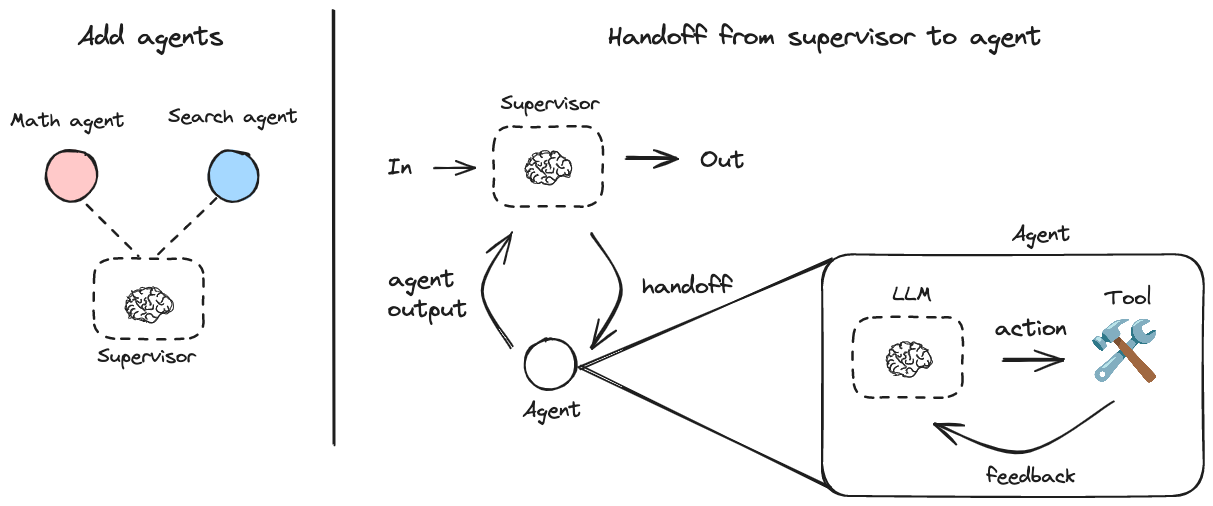

In [55]:
# @hidden_cell
from IPython.display import Image
url="https://raw.githubusercontent.com/langchain-ai/langgraph-supervisor/refs/heads/main/static/img/supervisor.png"
Image(url)


In [1]:
from langgraph.prebuilt import create_react_agent
from langgraph_supervisor import create_supervisor

In [4]:
from langchain_openai import ChatOpenAI
model = ChatOpenAI(model="gpt-4o")

In [5]:
# from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint

# llm = HuggingFaceEndpoint(
#     repo_id="meta-llama/Llama-3.1-70B-Instruct",
#     #task="text-generation",
#     #max_new_tokens=512,
#     #do_sample=False,
#     #repetition_penalty=1.03,
# )

# model = ChatHuggingFace(llm=llm)

In [6]:
# from smolagents import HfApiModel

# model = HfApiModel("meta-llama/Llama-3.1-70B-Instruct")

In [7]:
# from langchain_ollama import ChatOllama

# model = ChatOllama(
#     model="llama3.1",
#     temperature=0,
#     # other params...
# )

In [ ]:
# def search_wikipedia_tool(query: str) -> str:
#     """
#     Fetches a summary of a Wikipedia page for a given query.
#     Args:
#         query: The search term to look up on Wikipedia.
#     Returns:
#         str: A summary of the Wikipedia page if successful, or an error message if the request fails.
#     Raises:
#         requests.exceptions.RequestException: If there is an issue with the HTTP request.
#     """
#     url = f"https://en.wikipedia.org/api/rest_v1/page/summary/{query}"

#     try:
#         response = requests.get(url)
#         response.raise_for_status()

#         data = response.json()
#         title = data["title"]
#         extract = data["extract"]

#         return f"Summary for {title}: {extract}"

#     except requests.exceptions.RequestException as e:
#         return f"Error fetching Wikipedia data: {str(e)}"

In [ ]:
# def get_news_headlines_tool() -> str:
#     """
#     Fetches the top news headlines from the News API for the United States.
#     This function makes a GET request to the News API to retrieve the top news headlines
#     for the United States. It returns the titles and sources of the top 5 articles as a
#     formatted string. If no articles are available, it returns a message indicating that
#     no news is available. In case of a request error, it returns an error message.
#     Returns:
#         str: A string containing the top 5 news headlines and their sources, or an error message.
#     """
#     api_key = newsapi_api_key  # Replace with your actual API key from https://newsapi.org/
#     url = f"https://newsapi.org/v2/top-headlines?country=us&apiKey={api_key}"

#     try:
#         response = requests.get(url)
#         response.raise_for_status()

#         data = response.json()
#         articles = data["articles"]

#         if not articles:
#             return "No news available at the moment."

#         headlines = [f"{article['title']} - {article['source']['name']}" for article in articles[:5]]
#         return "\n".join(headlines)

#     except requests.exceptions.RequestException as e:
#         return f"Error fetching news data: {str(e)}"

In [8]:
def add(a: float, b: float) -> float:
    """Add two numbers."""
    return a + b

def multiply(a: float, b: float) -> float:
    """Multiply two numbers."""
    return a * b

def web_search(query: str) -> str:
    """Search the web for information."""
    return (
        "Here are the headcounts for each of the FAANG companies in 2024:\n"
        "1. **Facebook (Meta)**: 67,317 employees.\n"
        "2. **Apple**: 164,000 employees.\n"
        "3. **Amazon**: 1,551,000 employees.\n"
        "4. **Netflix**: 14,000 employees.\n"
        "5. **Google (Alphabet)**: 181,269 employees."
    )

In [9]:
math_agent = create_react_agent(
    model=model,
    tools=[add, multiply],
    name="math_expert",
    prompt="You are a math expert. Always use one tool at a time."
)

In [10]:
research_agent = create_react_agent(
    model=model,
    tools=[web_search],
    name="research_expert",
    prompt="You are a world class researcher with access to web search. Do not do any math."
)

In [11]:
# Create supervisor workflow
workflow = create_supervisor(
    agents = [research_agent, math_agent],
    model=model,
    output_mode="full_history",
    prompt=(
        "You are a team supervisor managing a research expert and a math expert. "
        "For current events, use research_agent. "
        "For math problems, use math_agent."
    )
)

In [12]:
app = workflow.compile()

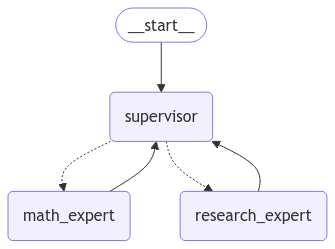

In [13]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what's the combined headcount of the FAANG companies in 2024?"
        }
    ]
})

In [15]:
for msg in result['messages']:
    print(msg.content)
    #print("\n\n")

what's the combined headcount of the FAANG companies in 2024?

Successfully transferred to research_expert

Here are the headcounts for each of the FAANG companies in 2024:
1. **Facebook (Meta)**: 67,317 employees.
2. **Apple**: 164,000 employees.
3. **Amazon**: 1,551,000 employees.
4. **Netflix**: 14,000 employees.
5. **Google (Alphabet)**: 181,269 employees.
Here are the headcounts for each of the FAANG companies in 2024:
1. **Facebook (Meta)**: 67,317 employees.
2. **Apple**: 164,000 employees.
3. **Amazon**: 1,551,000 employees.
4. **Netflix**: 14,000 employees.
5. **Google (Alphabet)**: 181,269 employees.
Here are the headcounts for each of the FAANG companies in 2024:
1. **Facebook (Meta)**: 67,317 employees.
2. **Apple**: 164,000 employees.
3. **Amazon**: 1,551,000 employees.
4. **Netflix**: 14,000 employees.
5. **Google (Alphabet)**: 181,269 employees.
Here are the headcounts for each of the FAANG companies in 2024:
1. **Facebook (Meta)**: 67,317 employees.
2. **Apple**: 164,00

In [17]:
print(result['messages'][-1].content)

The combined headcount of the FAANG companies in 2024 is approximately 1,977,586 employees.


In [20]:
def web_search(query: str) -> str:
    """Search the web for information."""
    return (
        "web research results"
    )

In [21]:
def docs_search(path: str) -> str:
    """Search the local docs for information."""
    return (
        "docs research results"
    )

In [22]:
web_research_agent = create_react_agent(
    model=model,
    tools=[web_search],
    name="web_research_expert",
    prompt="You are a world class web researcher with access to web search."
)

In [23]:
docs_research_agent = create_react_agent(
    model=model,
    tools=[docs_search],
    name="docs_research_expert",
    prompt="You are a world class local documents researcher with access to web search."
)

In [24]:
research_team = create_supervisor(
    [web_research_agent, docs_research_agent],
    model=model,
).compile(name="research_team")


In [25]:
writing_agent = create_react_agent(
    model=model,
    tools=[], # tools to help writing
    name="writing_expert",
    prompt="You are a world class writing expert."
)

In [27]:
reviewing_agent = create_react_agent(
    model=model,
    tools=[], # tools to help reviewing
    name="reviewing_expert",
    prompt="You are a world class reviewing expert."
)

In [28]:
creating_team = create_supervisor(
    [writing_agent, reviewing_agent],
    model=model,
).compile(name="creating_team")

In [30]:
top_level_supervisor = create_supervisor(
    [research_team, creating_team],
    model=model,
).compile(name="top_level_supervisor")

In [31]:
workflow = create_supervisor(
    agents = [research_team, creating_team],
    model=model,
    output_mode="full_history",
    prompt=(
        "You are a team supervisor managing a research team and content creating team"
    )
)

In [32]:
app = workflow.compile()

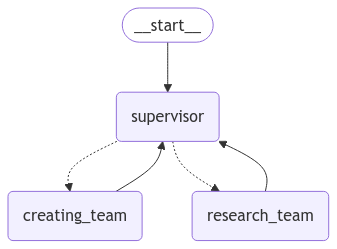

In [33]:
display(Image(app.get_graph().draw_mermaid_png()))